<a href="https://colab.research.google.com/github/shravankumargulvadi/Assignment-4/blob/master/Assignment_4_Second.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Second Design Iteration


* Adding Batch Normalization after each 3x3 convolution layers.
* Adding Dropout after each Batch Norm - Idea followed- dropout nullifies a percentage of input parameters to avoid overfitting. Therefore it makes sense to use higher dropout in layers which have higher no of parameters and low dropout in other layers.
* Learning rate is set at 0.003.

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


## Importing all the required Modules from keras

##Dropout-randomly drops specified proportion of kernels/neurons-helps in overcoming overfitting.
All other modules same as in previous assignment

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D, BatchNormalization
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils

from keras.datasets import mnist

## Seeding for Repeatability

In [0]:
seed = 7
np.random.seed(seed)

### Load pre-shuffled MNIST data into train and test sets

## Splitting the data for training and testing

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## Printing Size of the image in MNIST and a sample image

(60000, 28, 28)


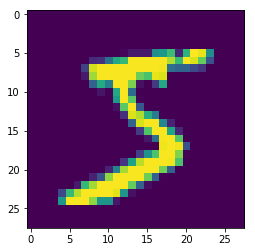

In [5]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

## Reshaping the MNIST images to 28x28x1

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

## Setting the 'type' to float32 (Decimel) and Normalizing the pixels by deviding it by 255

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [8]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

## Converting the target values to 1 hot encoding

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [10]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

## Building the main model

In [11]:
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) #26
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(Convolution2D(16, 3, 3, activation='relu')) #24
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(Convolution2D(10, 1, 1, activation='relu')) #24
model.add(MaxPooling2D(pool_size=(2, 2)))#12

model.add(Convolution2D(14, 3, 3, activation='relu'))#10
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation='relu'))#8
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(18, 3, 3, activation='relu'))#6
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(20, 3, 3, activation='relu'))#4
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(Convolution2D(10, 4, 4)) #1

model.add(Flatten())
model.add(Activation('softmax'))



Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(14, (3, 3), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(18, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `Conv2D` call to the Ke

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 10)        40        
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 10)        170       
__________

## Configuring the model for training
1.Loss- Is a measure of error and is the function which is to be minimized by the optimizer

2.Optimizer- optimizes the result by updating the weights in accordance with the loss

3. Metrics-A metric is a function that is used to judge the performance of the model

In [0]:
from keras.optimizers import Adam
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])


## Creating Checkpoints to save the best weights

In [0]:
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

## Model training begins on training data witha each batch containing 32 images and no of epochs is 50

In [15]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1, validation_data=(X_test, Y_test), callbacks=callbacks_list)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 26s 435us/step - loss: 0.1441 - acc: 0.9551 - val_loss: 0.0996 - val_acc: 0.9707

Epoch 00001: val_acc improved from -inf to 0.97070, saving model to weights.best.hdf5
Epoch 2/10
60000/60000 [==============================] - 24s 392us/step - loss: 0.0685 - acc: 0.9787 - val_loss: 0.0314 - val_acc: 0.9895

Epoch 00002: val_acc improved from 0.97070 to 0.98950, saving model to weights.best.hdf5
Epoch 3/10
60000/60000 [==============================] - 24s 407us/step - loss: 0.0545 - acc: 0.9834 - val_loss: 0.0387 - val_acc: 0.9883

Epoch 00003: val_acc did not improve from 0.98950
Epoch 4/10
60000/60000 [==============================] - 23s 387us/step - loss: 0.0482 - acc: 0.9849 - val_loss: 0.0404 - val_acc: 0.9869

Epoch 00004: val_acc did not improve from 0.98950
Epoch 5/10
60000/60000 [==============================] - 24s 401us/step - loss: 0.0431 - acc: 0.9869 - val_loss: 0